In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# Select best predictors
features = ["Previous_Scores", "Attendance", "Motivation_Level", "Hours_Studied", "Tutoring_Sessions"]

# Drop rows with missing target or features
data = df[features + ["Exam_Score"]].dropna()

# Encode categorical/text columns
label_cols = ["Attendance", "Motivation_Level"]  # الأعمدة النصية
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Define X and y
X = data[features]
y = data["Exam_Score"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

# Print results
print("Model Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Model Coefficients:
Previous_Scores: 0.0480
Attendance: 0.1990
Motivation_Level: -0.1353
Hours_Studied: 0.2905
Tutoring_Sessions: 0.5143

Intercept: 53.2672
R²: 0.6508
RMSE: 2.1810
MAE: 1.2614



--- Descriptive Statistics ---
       Previous_Scores   Attendance  Motivation_Level  Hours_Studied  \
count      6607.000000  6607.000000       6607.000000    6607.000000   
mean         75.070531    79.977448          0.906463      19.975329   
std          14.399784    11.547475          0.695798       5.990594   
min          50.000000    60.000000          0.000000       1.000000   
25%          63.000000    70.000000          0.000000      16.000000   
50%          75.000000    80.000000          1.000000      20.000000   
75%          88.000000    90.000000          1.000000      24.000000   
max         100.000000   100.000000          2.000000      44.000000   

       Tutoring_Sessions   Exam_Score  
count        6607.000000  6607.000000  
mean            1.493719    67.235659  
std             1.230570     3.890456  
min             0.000000    55.000000  
25%             1.000000    65.000000  
50%             1.000000    67.000000  
75%             2.000000    69.000000  

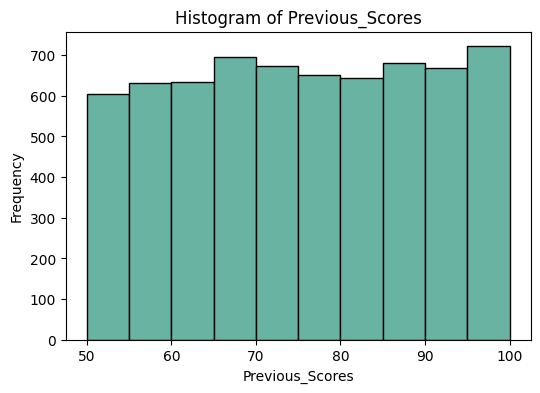

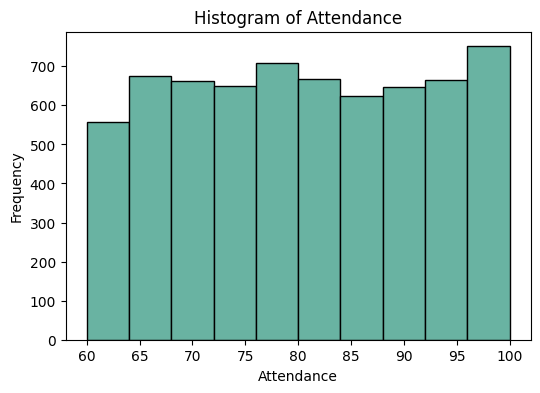

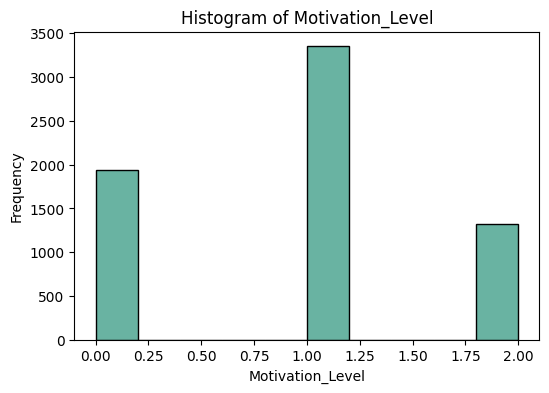

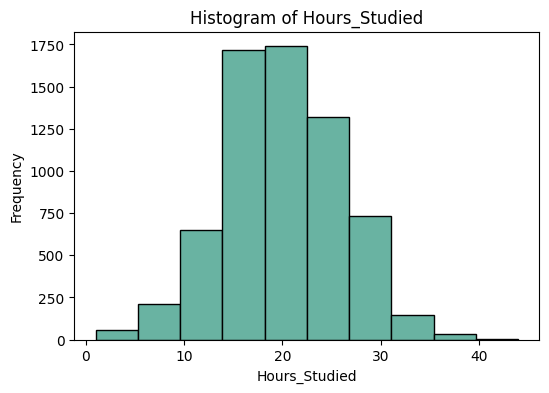

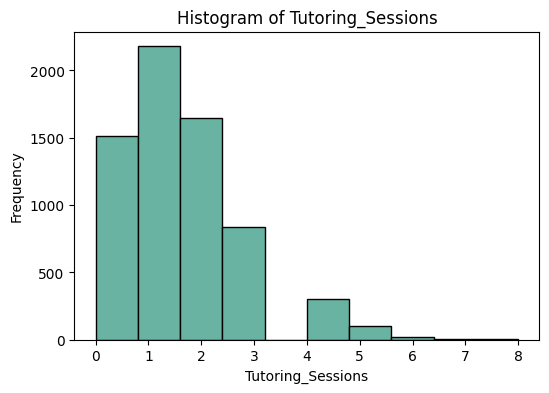

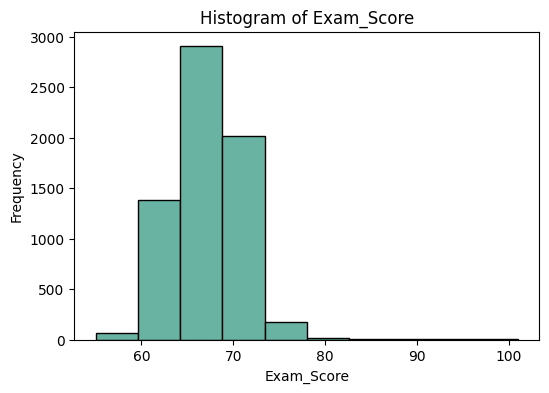

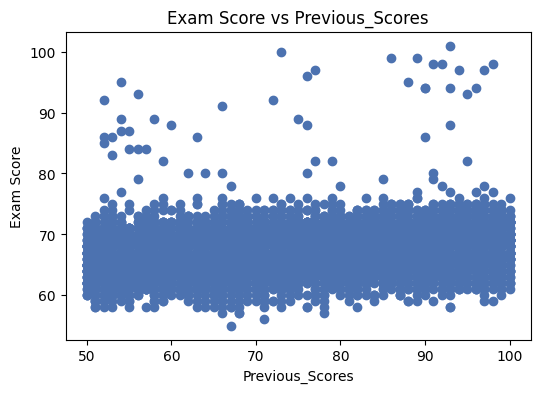

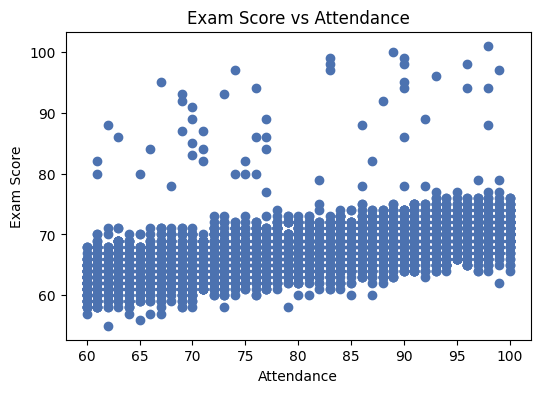

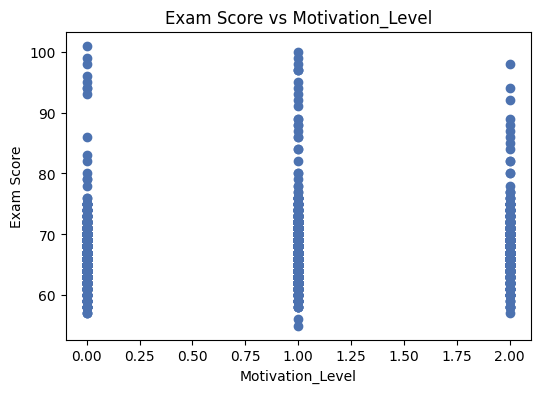

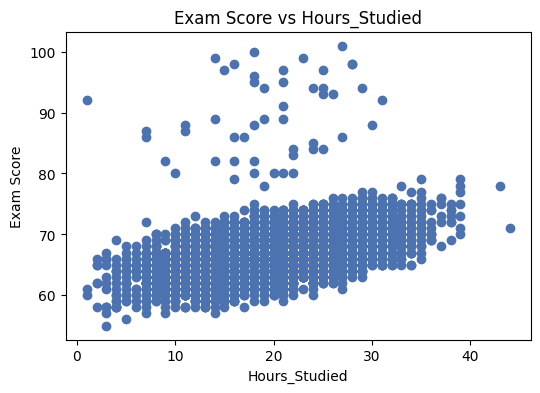

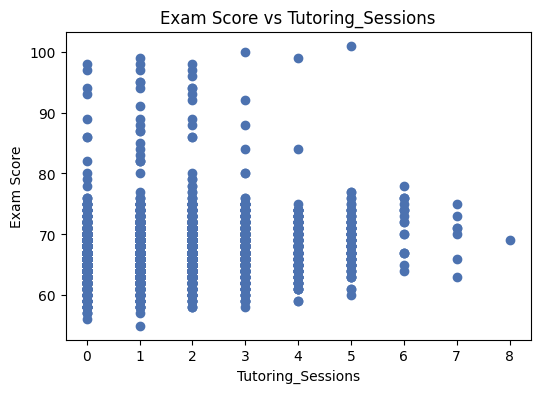


--- Model Coefficients ---
Previous_Scores: 0.0480
Attendance: 0.1994
Motivation_Level: 0.5222
Hours_Studied: 0.2910
Tutoring_Sessions: 0.5148

Intercept: 40.6311
R²: 0.6597
RMSE: 2.1529
MAE: 1.2305


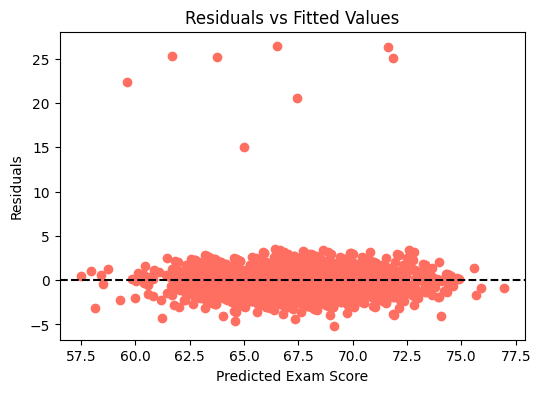

In [4]:
# ==========================
# 0) Import Libraries
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# ==========================
# 1) Load Dataset
# ==========================
df = pd.read_csv("StudentPerformanceFactors.csv")

# ==========================
# 2) Select Best Predictors
# ==========================
features = ["Previous_Scores", "Attendance", "Motivation_Level", "Hours_Studied", "Tutoring_Sessions"]

# Drop rows with missing target or features
data = df[features + ["Exam_Score"]].dropna()

# ==========================
# 3) Encode Categorical Columns
# ==========================
# Custom encoding for Motivation_Level
motivation_map = {"Low": 0, "Medium": 1, "High": 2}
data["Motivation_Level"] = data["Motivation_Level"].map(motivation_map)

# Encode Attendance if textual (optional, depends on your data)
if data["Attendance"].dtype == "object":
    attendance_map = {"Low": 0, "Medium": 1, "High": 2}
    data["Attendance"] = data["Attendance"].map(attendance_map)

# ==========================
# 4) Descriptive Statistics
# ==========================
print("\n--- Descriptive Statistics ---")
print(data.describe())

# ==========================
# 5) Histograms
# ==========================
for col in features + ["Exam_Score"]:
    plt.figure(figsize=(6,4))
    plt.hist(data[col], bins=10, color="#69b3a2", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# ==========================
# 6) Scatter Plots vs Exam_Score
# ==========================
for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(data[col], data["Exam_Score"], color="#4C72B0")
    plt.title(f"Exam Score vs {col}")
    plt.xlabel(col)
    plt.ylabel("Exam Score")
    plt.show()

# ==========================
# 7) Prepare Data for Regression
# ==========================
X = data[features]
y = data["Exam_Score"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ==========================
# 8) Build & Train Model
# ==========================
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ==========================
# 9) Model Evaluation
# ==========================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print("\n--- Model Coefficients ---")
for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# ==========================
# 10) Residual Plot
# ==========================
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color="#FF6F61")
plt.axhline(0, linestyle="--", color="black")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.show()



=== Correlation of all features with Exam_Score ===
Exam_Score                    1.000000
Attendance                    0.580259
Hours_Studied                 0.445104
Previous_Scores               0.174283
Access_to_Resources           0.167856
Tutoring_Sessions             0.156829
Parental_Involvement          0.156014
Peer_Influence                0.099133
Motivation_Level              0.088502
Distance_from_Home            0.088083
Extracurricular_Activities    0.063063
Internet_Access               0.051124
Parental_Education_Level      0.040816
Physical_Activity             0.025148
School_Type                   0.010868
Gender                        0.004932
Sleep_Hours                  -0.017171
Family_Income                -0.022651
Teacher_Quality              -0.059247
Learning_Disabilities        -0.083911
Name: Exam_Score, dtype: float64


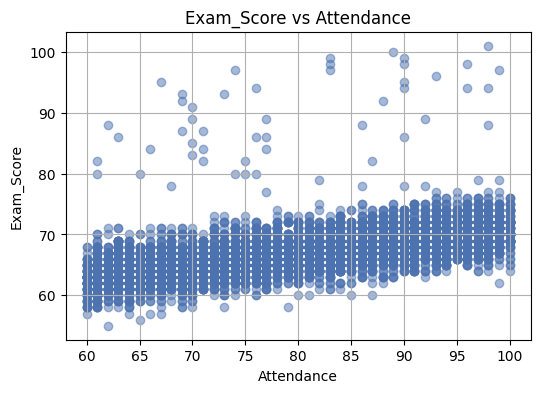

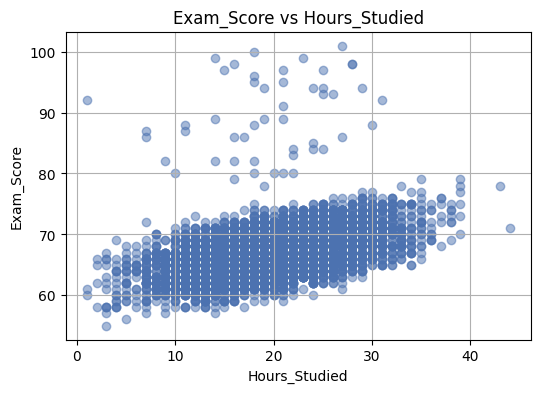

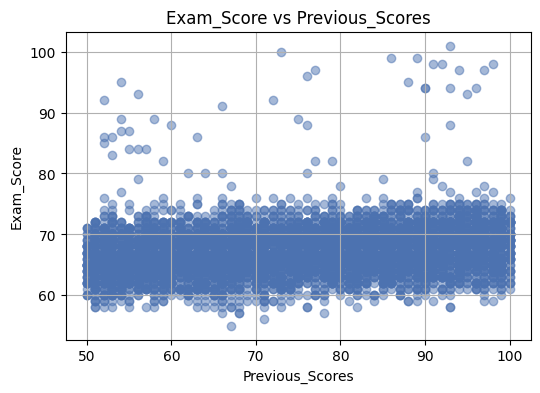

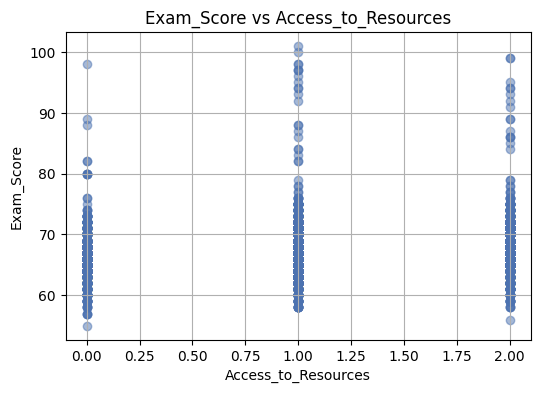

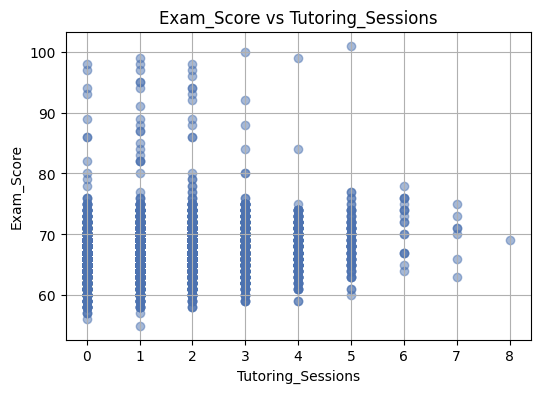

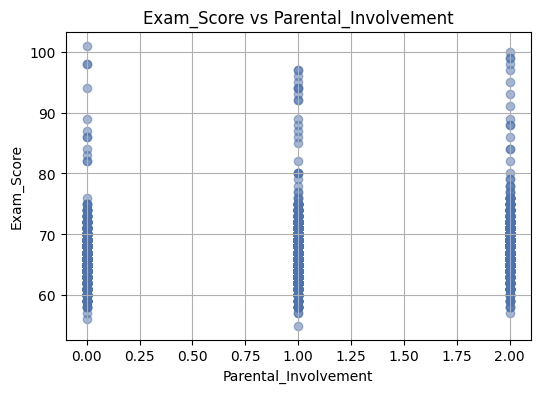

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# كل المتغيرات
features = ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
            'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
            'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
            'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
            'Parental_Education_Level', 'Distance_from_Home', 'Gender']

# Drop missing values
data = df[features + ["Exam_Score"]].dropna()

# Define common ordinal mappings for 'Low', 'Medium', 'High'
ordinal_map = {"Low": 0, "Medium": 1, "High": 2}

# Encode categorical columns if needed
# Motivation_Level
if data["Motivation_Level"].dtype == "object":
    data["Motivation_Level"] = data["Motivation_Level"].map(ordinal_map)

# Attendance
if data["Attendance"].dtype == "object":
    data["Attendance"] = data["Attendance"].map(ordinal_map)

# Parental_Involvement
if data["Parental_Involvement"].dtype == "object":
    data["Parental_Involvement"] = data["Parental_Involvement"].map(ordinal_map)

# Access_to_Resources
if data["Access_to_Resources"].dtype == "object":
    data["Access_to_Resources"] = data["Access_to_Resources"].map(ordinal_map)

# Gender
if data["Gender"].dtype == "object":
    gender_map = {"Male":0, "Female":1}
    data["Gender"] = data["Gender"].map(gender_map)

# School_Type
if data["School_Type"].dtype == "object":
    school_map = {k:i for i,k in enumerate(data["School_Type"].unique())}
    data["School_Type"] = data["School_Type"].map(school_map)

# General Label Encoding for any remaining object columns
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# ==========================
# 1) Correlation with Exam_Score
# ==========================
correlations = data.corr()["Exam_Score"].sort_values(ascending=False)
print("\n=== Correlation of all features with Exam_Score ===")
print(correlations)

# ==========================
# 2) Scatter Plots for top 6 predictors
# ==========================
top_features = correlations.index[1:7]  # أعلى 6 متغيرات بعد Exam_Score
for col in top_features:
    plt.figure(figsize=(6,4))
    plt.scatter(data[col], data["Exam_Score"], alpha=0.5, color="#4C72B0")
    plt.title(f"Exam_Score vs {col}")
    plt.xlabel(col)
    plt.ylabel("Exam_Score")
    plt.grid(True)
    plt.show()